In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [1]:
print('hello')

hello


In [99]:
preds_current_stats = pd.read_csv('Preds_current_season.csv')

In [100]:
preds_current_stats = preds_current_stats.head(55)

In [101]:
szn_78 = pd.read_csv('teams_07_08.csv')
szn_89 = pd.read_csv('teams_08_09.csv')
szn_910 = pd.read_csv('teams_09_10.csv')
szn_1011 = pd.read_csv('teams_10_11.csv')
szn_1112 = pd.read_csv('teams_11_12.csv')
szn_1314 = pd.read_csv('teams_13_14.csv')
szn_1415 = pd.read_csv('teams_14_15.csv')
szn_1516 = pd.read_csv('teams_15_16.csv')
szn_1617 = pd.read_csv('teams_16_17.csv')
szn_1718 = pd.read_csv('teams_17_18.csv')

In [102]:
szn_lists = [szn_78, szn_89, szn_910, szn_1011, szn_1112, szn_1314, szn_1415, szn_1516, szn_1617, szn_1718]

In [103]:
full_szns = pd.concat(szn_lists, axis=0, ignore_index=True)

In [104]:
#dropping null rows
full_szns.loc[full_szns['away_wins'] ==0].index.to_list()
full_szns = full_szns.drop(full_szns.loc[full_szns['away_wins'] ==0].index.to_list())

In [105]:
PO_teams = full_szns.loc[full_szns['made_playoffs']=="Yes"]

In [106]:
noPO_teams = full_szns.loc[full_szns['made_playoffs']=="No"]

In [107]:
(PO_teams.away_wins+PO_teams.home_wins).median()

46.0

### Is 46 a good benchmark for how many wins we should aim for the predators to end up with?

In [108]:
PO_teams['total_wins'] = PO_teams.away_wins+PO_teams.home_wins
noPO_teams['total_wins'] = noPO_teams.away_wins+noPO_teams.home_wins
full_szns['total_wins'] = full_szns.away_wins + full_szns.home_wins

C:\Users\David\AppData\Local\Temp\ipykernel_1620\38687713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PO_teams['total_wins'] = PO_teams.away_wins+PO_teams.home_wins
C:\Users\David\AppData\Local\Temp\ipykernel_1620\38687713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noPO_teams['total_wins'] = noPO_teams.away_wins+noPO_teams.home_wins


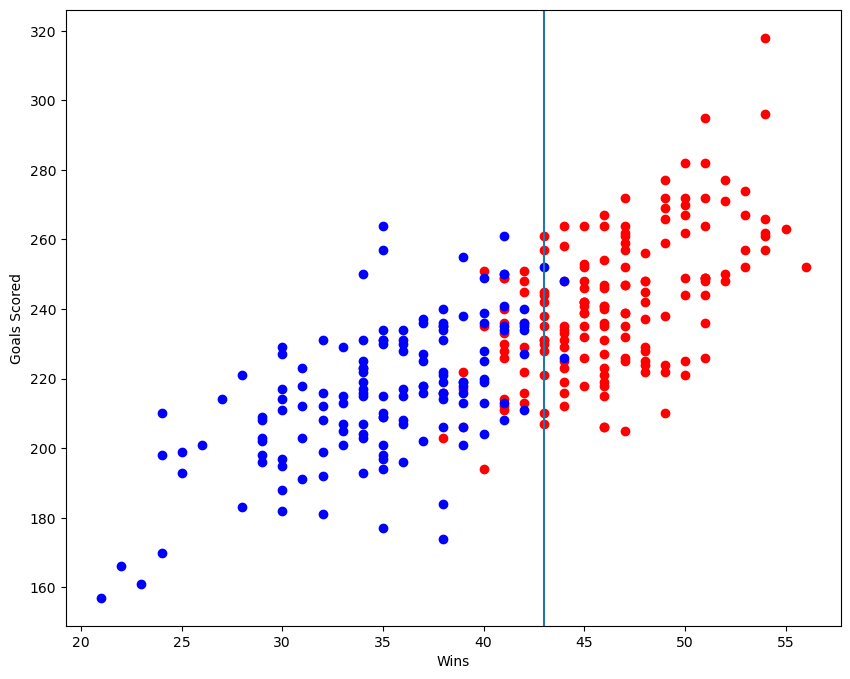

In [109]:
plt.figure(figsize=(10,8))
plt.scatter(x=PO_teams.total_wins,y = PO_teams.total_goals_scored,c="red")
plt.scatter(x=noPO_teams.total_wins,y = noPO_teams.total_goals_scored,c="blue")
plt.xlabel("Wins")
plt.ylabel("Goals Scored")
plt.axvline(x = 43)

### Based on this plot, it seems very likely that a team will make it to playoffs if they have more than 43 wins

### What about goals scored / allowed?

In [110]:
PO_teams['goal_diff'] = PO_teams.total_goals_scored-PO_teams.total_goals_against
noPO_teams['goal_diff'] = noPO_teams.total_goals_scored-noPO_teams.total_goals_against
full_szns['goal_diff'] = full_szns.total_goals_scored-full_szns.total_goals_against

C:\Users\David\AppData\Local\Temp\ipykernel_1620\2411080551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PO_teams['goal_diff'] = PO_teams.total_goals_scored-PO_teams.total_goals_against
C:\Users\David\AppData\Local\Temp\ipykernel_1620\2411080551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noPO_teams['goal_diff'] = noPO_teams.total_goals_scored-noPO_teams.total_goals_against


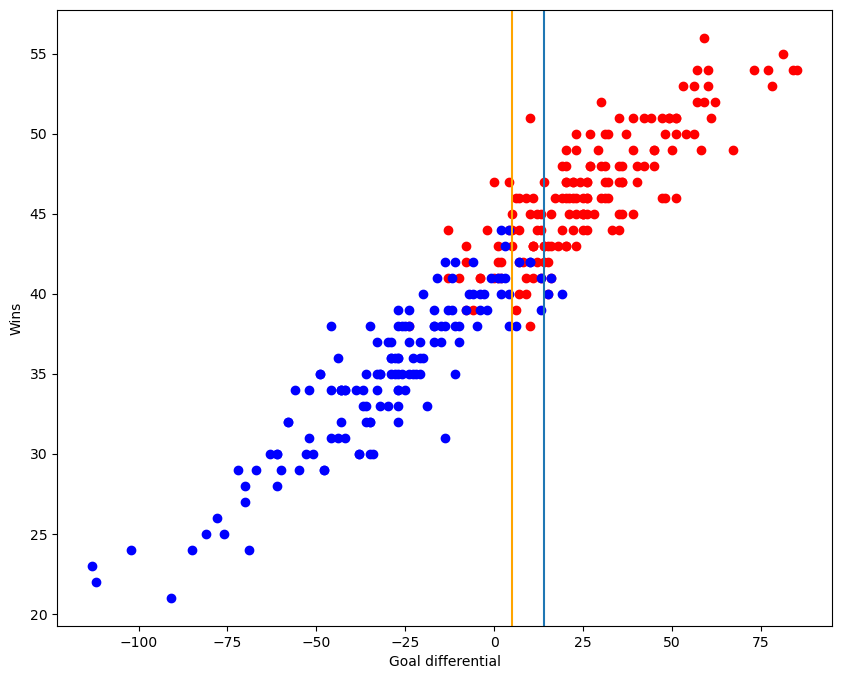

In [145]:
plt.figure(figsize=(10,8))
plt.scatter(x=PO_teams.goal_diff,y = PO_teams.total_wins,c="red")
plt.scatter(x=noPO_teams.goal_diff,y = noPO_teams.total_wins,c="blue")
plt.xlabel("Goal differential")
plt.ylabel("Wins")
plt.axvline(x = 14)
plt.axvline(x = 5, c='orange')


### If a team has a goal differntial of at least 14, they seem very likely to make it in to the playoffs. If a team has a goal differential greater than 5, they still seem likely to make the playoffs, but less likely. We can also see that wins and goal differential seem to have a linear relationship

<AxesSubplot:xlabel='goal_diff', ylabel='total_wins'>

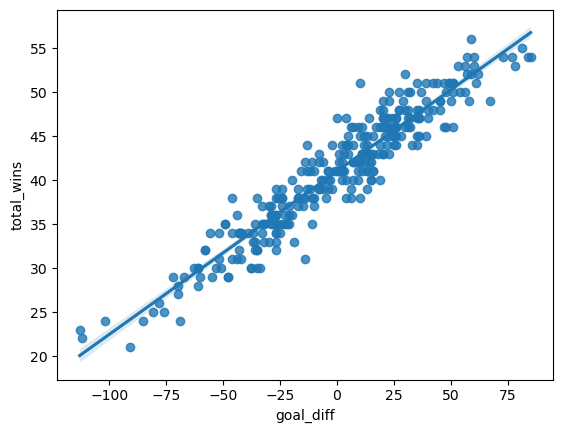

In [117]:
### do regplot
sns.regplot(x=full_szns.goal_diff, y = full_szns.total_wins, data=full_szns)

In [119]:
full_szns.corr()

,Unnamed: 0,away_wins,home_wins,away_losses,home_losses,total_goals_scored,total_goals_against,total_wins,goal_diff
Unnamed: 0,1.000000,-0.321791,-0.287193,0.321791,0.287193,-0.163022,0.409971,-0.354361,-0.378067
away_wins,-0.321791,1.000000,0.474713,-1.000000,-0.474713,0.600182,-0.636668,0.855180,0.813322
home_wins,-0.287193,0.474713,1.000000,-0.474713,-1.000000,0.637289,-0.605386,0.862170,0.816770
away_losses,0.321791,-1.000000,-0.474713,1.000000,0.474713,-0.600182,0.636668,-0.855180,-0.813322
home_losses,0.287193,-0.474713,-1.000000,0.474713,1.000000,-0.637289,0.605386,-0.862170,-0.816770
total_goals_scored,-0.163022,0.600182,0.637289,-0.600182,-0.637289,1.000000,-0.156841,0.720783,0.755823
total_goals_against,0.409971,-0.636668,-0.605386,0.636668,0.605386,-0.156841,1.000000,-0.722997,-0.765216
total_wins,-0.354361,0.855180,0.862170,-0.855180,-0.862170,0.720783,-0.722997,1.000000,0.949169
goal_diff,-0.378067,0.813322,0.816770,-0.813322,-0.816770,0.755823,-0.765216,0.949169,1.000000


In [121]:
#making dummy variable for regression
full_szns['binary_playoffs'] = full_szns['made_playoffs'].apply(lambda x: 1 if x == 'Yes' else 0)
full_szns.head()

,Unnamed: 0,team_name,away_wins,home_wins,away_losses,home_losses,total_goals_scored,total_goals_against,made_playoffs,total_wins,goal_diff,binary_playoffs
0,0,New Jersey Devils,21.0,25.0,20.0,16.0,206.0,197.0,Yes,46.0,9.0,1
1,1,Philadelphia Flyers,21.0,21.0,20.0,20.0,248.0,233.0,Yes,42.0,15.0,1
2,2,Los Angeles Kings,15.0,17.0,26.0,24.0,231.0,266.0,No,32.0,-35.0,0
3,3,Tampa Bay Lightning,11.0,20.0,30.0,21.0,223.0,267.0,No,31.0,-44.0,0
4,4,Boston Bruins,20.0,21.0,21.0,20.0,212.0,222.0,Yes,41.0,-10.0,1


### Above, the regression line can be seen. Also, the correlation coefficient between goal_diff and total_wins is 0.95 - very high!

# boxplots of various stats vs made_playoffs

<AxesSubplot:xlabel='made_playoffs', ylabel='total_goals_scored'>

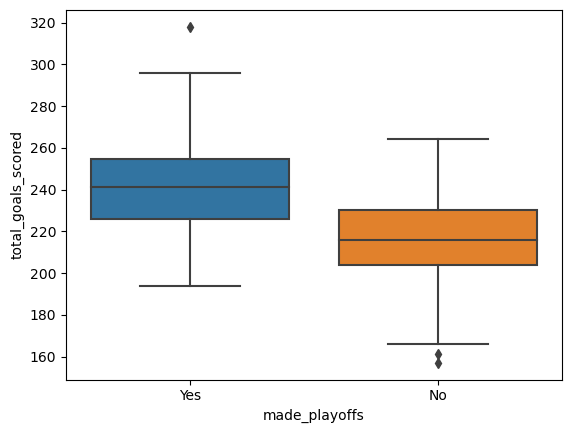

In [137]:
sns.boxplot(x='made_playoffs', y= 'total_goals_scored', data = full_szns)

<AxesSubplot:xlabel='made_playoffs', ylabel='total_goals_against'>

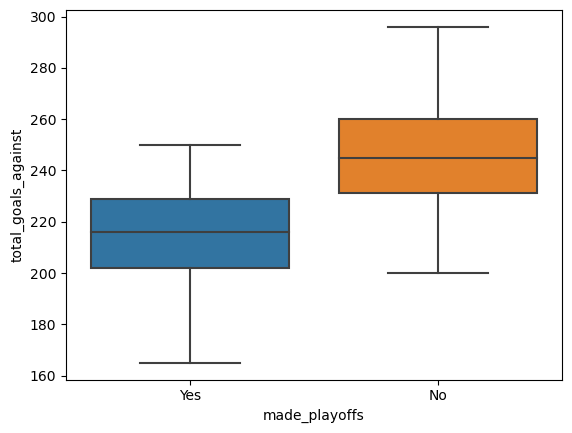

In [139]:
sns.boxplot(x='made_playoffs', y= 'total_goals_against', data = full_szns)

## Making models

In [147]:
model = smf.ols(formula = 'total_wins~goal_diff', data = full_szns).fit()
model.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_wins   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     2719.
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          3.84e-152
Time:                        09:23:55   Log-Likelihood:                -670.98
No. Observations:                 301   AIC:                             1346.
Df Residuals:                     299   BIC:                             1353.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.0000      0.130    315.317      0.000      40.744      41.256
goal_diff      0.1853      0.004     52.142      0.000       0.178       0.192
==============================================================================
Omnibus:                        2.316   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                2.066
Skew:                           0.130   Prob(JB):                        0.356
Kurtosis:                       3.312   Cond. No.                         36.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
preds_current_stats['Goals For'].sum() - preds_current_stats['Goals Against'].sum()
#preds have a current gd of -10, lets use that to predict

-10.0

In [129]:
model.get_prediction({'goal_diff' : -10}).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,39.146626,0.134799,38.881352,39.411901,34.699251,43.594002


Based on goal differential alone, if the preds keep their current differential of -10, we can assume with 95% accuracy that they will end the season with 38 or 39 wins. Thats 4 games below the cutoff for being likely to make playoffs based on our EDA, so they need to improve their goal differential.

In [154]:
model.get_prediction({'goal_diff' : 13}).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,43.409386,0.137994,43.137822,43.680949,38.96163,47.857141


 ### using the model, we can try to predict what goal differential is needed to be likely to have a record of 43 or more (the cutoff we found earlier for being likely to make playoffs). The model suggest that a goal differential of 13 gives us 95% confidence that a team will have a record of 43 games won, which is close to our cutoff of being playoff likely with a GD of 14.

# model to predict 

In [134]:
model = smf.ols(formula = 'total_wins~total_goals_scored+total_goals_against', data = full_szns).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_wins   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1355.
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          2.42e-150
Time:                        09:13:02   Log-Likelihood:                -670.94
No. Observations:                 301   AIC:                             1348.
Df Residuals:                     298   BIC:                             1359.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              40.4581      1.919     21.083      0.000      36.682      44.235
total_goals_scored      0.1865      0.006     33.733      0.000       0.176       0.197
total_goals_against    -0.1842      0.005    -33.875      0.000      -0.195      -0.173
==============================================================================
Omnibus:                        2.313   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                2.048
Skew:                           0.136   Prob(JB):                        0.359
Kurtosis:                       3.299   Cond. No.                     4.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
preds_current_stats['Goals For'].sum()

157.0

In [136]:
preds_current_stats['Goals Against'].sum()

167.0

In [ ]:
model.get_prediction({'total_goals_scored' : -10}).summary_frame(alpha=0.05)